# Loss functions

## Prepare data

In [1]:
# obtain the data
from numpy import load

y = load('yaleExtB_target.npy')
X = load('yaleExtB_data.npy')

In [2]:
from sklearn.model_selection import train_test_split

# split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33,
                                                    shuffle=True)

In [3]:
from sklearn.decomposition import PCA

# PCA 
nof_prin_components = 200  # PARAMETER for optimisation in expereiments
pca = PCA(n_components=nof_prin_components, whiten=True).fit(X_train)
# applies PCA to the train and test images to calculate the principal components
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)

## MLP classifier

In [17]:
# MLP classifier

from sklearn.neural_network import MLPClassifier

# train a neural network
nohn = 200 # nof hidden neurons
mlp = MLPClassifier(hidden_layer_sizes=(nohn,), 
                    solver='sgd', 
                    activation='tanh', 
                    verbose=True,
                    batch_size=256, 
                    early_stopping=True)

In [18]:
print("Training the classifier")
mlp.fit(X_train_pca, y_train)

Training the classifier
Iteration 1, loss = 3.63960415
Validation score: 0.009901
Iteration 2, loss = 3.62380145
Validation score: 0.009901
Iteration 3, loss = 3.59943899
Validation score: 0.009901
Iteration 4, loss = 3.56955539
Validation score: 0.009901
Iteration 5, loss = 3.53610110
Validation score: 0.009901
Iteration 6, loss = 3.50053887
Validation score: 0.009901
Iteration 7, loss = 3.46334303
Validation score: 0.009901
Iteration 8, loss = 3.42549482
Validation score: 0.009901
Iteration 9, loss = 3.38737521
Validation score: 0.019802
Iteration 10, loss = 3.34881683
Validation score: 0.019802
Iteration 11, loss = 3.31000320
Validation score: 0.029703
Iteration 12, loss = 3.27151201
Validation score: 0.039604
Iteration 13, loss = 3.23286457
Validation score: 0.039604
Iteration 14, loss = 3.19448754
Validation score: 0.039604
Iteration 15, loss = 3.15651798
Validation score: 0.039604
Iteration 16, loss = 3.11833455
Validation score: 0.039604
Iteration 17, loss = 3.08043086
Validatio

MLPClassifier(activation='tanh', batch_size=256, early_stopping=True,
              hidden_layer_sizes=(200,), solver='sgd', verbose=True)

### Loss curve

In [12]:
loss_values = mlp.loss_curve_

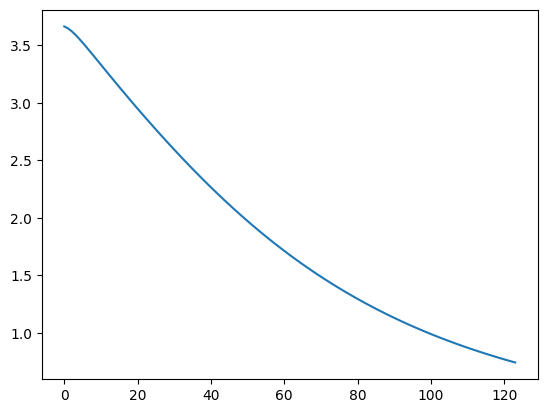

In [36]:
from matplotlib import pyplot as plt

plt.plot(loss_values)
plt.show()

In [15]:
print(mlp.best_validation_score_)

0.8415841584158416


## MLPRegressor

In [29]:
''' 
    https://scikit-learn.org/stable/modules/neural_networks_supervised.html

    Class MLPRegressor implements a multi-layer perceptron (MLP) that 
    trains using backpropagation with no activation function in the 
    output layer, which can also be seen as using the identity 
    function as activation function. Therefore, it uses the square 
    error as the loss function, and the output is a set of 
    continuous values.
'''
# MLP regressor
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
from sklearn.neural_network import MLPRegressor

# train a neural network
regr = MLPRegressor(max_iter = 500, 
                    verbose=True,
                   early_stopping=True)

In [30]:
regr.fit(X_train_pca, y_train)

Iteration 1, loss = 261.01835139
Validation score: -2.786813
Iteration 2, loss = 250.93371396
Validation score: -2.677446
Iteration 3, loss = 241.59706546
Validation score: -2.571384
Iteration 4, loss = 232.53969192
Validation score: -2.466153
Iteration 5, loss = 223.89159191
Validation score: -2.363657
Iteration 6, loss = 215.20255864
Validation score: -2.263893
Iteration 7, loss = 206.87951653
Validation score: -2.162781
Iteration 8, loss = 198.51781640
Validation score: -2.063581
Iteration 9, loss = 190.36237442
Validation score: -1.963960
Iteration 10, loss = 182.14940925
Validation score: -1.866297
Iteration 11, loss = 174.10085271
Validation score: -1.768581
Iteration 12, loss = 166.07735707
Validation score: -1.672716
Iteration 13, loss = 158.24663657
Validation score: -1.576926
Iteration 14, loss = 150.34986150
Validation score: -1.481830
Iteration 15, loss = 142.47252061
Validation score: -1.386502
Iteration 16, loss = 134.72675498
Validation score: -1.291550
Iteration 17, los

MLPRegressor(early_stopping=True, max_iter=500, verbose=True)

In [31]:
y_pred = mlp.predict(X_test_pca)

In [32]:
from sklearn.metrics import classification_report

# precision, recall, f1-score and support for the scores
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         2.0       0.86      0.67      0.75        18
         3.0       0.87      0.72      0.79        18
         4.0       0.86      0.95      0.90        20
         5.0       0.86      0.75      0.80        16
         6.0       0.88      0.88      0.88        17
         7.0       0.90      1.00      0.95        18
         8.0       0.74      0.78      0.76        18
         9.0       0.94      0.94      0.94        18
        11.0       0.92      0.92      0.92        12
        12.0       0.92      1.00      0.96        11
        13.0       0.94      0.68      0.79        25
        15.0       0.88      0.88      0.88        16
        16.0       0.68      0.90      0.78        21
        17.0       0.93      0.76      0.84        17
        18.0       0.82      1.00      0.90        14
        20.0       0.77      1.00      0.87        10
        22.0       0.69      0.85      0.76        13
        23.0       1.00    

In [33]:
regr_loss = regr.loss_curve_

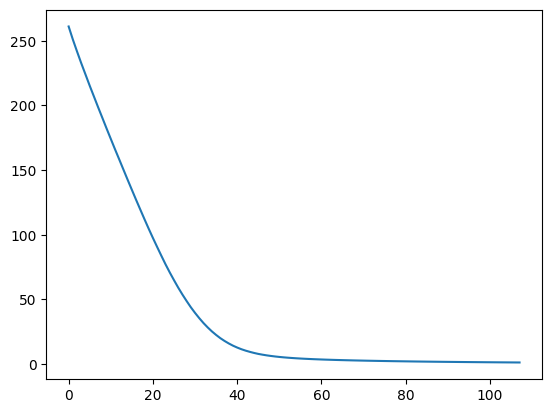

In [35]:
plt.plot(regr_loss)
plt.show()

In [26]:
print(regr.)

399990
